### 1 - PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import h5py
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [2]:
#ls

## 2 - DATA LOADING

In [3]:
train_data = h5py.File('Signs_Data_Training.h5')
test_data = h5py.File('Signs_Data_Testing.h5')

In [4]:
train_data.keys(), test_data.keys()

(<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>,
 <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>)

In [5]:
X_train = train_data['train_set_x']
Y_train = train_data['train_set_y']
X_test = test_data['test_set_x']
Y_test = test_data['test_set_y']

In [6]:
print(f'X_train Shape : {X_train.shape}\nX_test Shape : {X_test.shape}')
print(f'Y_train Shape : {Y_train.shape}\nY_test Shape : {Y_test.shape}')

X_train Shape : (1080, 64, 64, 3)
X_test Shape : (120, 64, 64, 3)
Y_train Shape : (1080,)
Y_test Shape : (120,)


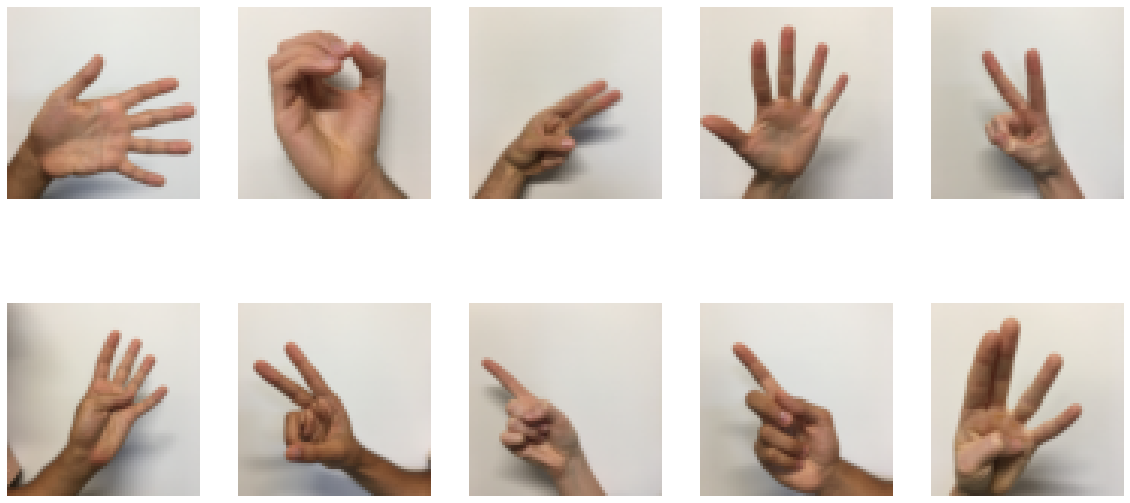

In [7]:
plt.figure(0, figsize = (20, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i])
    #print(Y_train[i])

In [8]:
type(X_train), type(X_test), type(Y_train), type(Y_test)

(h5py._hl.dataset.Dataset,
 h5py._hl.dataset.Dataset,
 h5py._hl.dataset.Dataset,
 h5py._hl.dataset.Dataset)

In [9]:
# Change dataset to numpy array 
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [10]:
X_train[0]

array([[[227, 220, 214],
        [227, 221, 215],
        [227, 222, 215],
        ...,
        [232, 230, 224],
        [231, 229, 222],
        [230, 229, 221]],

       [[227, 221, 214],
        [227, 221, 215],
        [228, 221, 215],
        ...,
        [232, 230, 224],
        [231, 229, 222],
        [231, 229, 221]],

       [[227, 221, 214],
        [227, 221, 214],
        [227, 221, 215],
        ...,
        [232, 230, 224],
        [231, 229, 223],
        [230, 229, 221]],

       ...,

       [[119,  81,  51],
        [124,  85,  55],
        [127,  87,  58],
        ...,
        [210, 211, 211],
        [211, 212, 210],
        [210, 211, 210]],

       [[119,  79,  51],
        [124,  84,  55],
        [126,  85,  56],
        ...,
        [210, 211, 210],
        [210, 211, 210],
        [209, 210, 209]],

       [[119,  81,  51],
        [123,  83,  55],
        [122,  82,  54],
        ...,
        [209, 210, 210],
        [209, 210, 209],
        [208, 209, 209]]

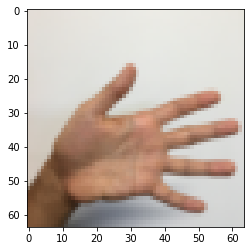

In [11]:
plt.imshow(X_train[0])

In [12]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [13]:
print('Train : ', X_train.shape)
print('Test : ', X_test.shape)

Train :  (1080, 64, 64, 3)
Test :  (120, 64, 64, 3)


## 3 - MODEL LOADING

In [14]:
model = VGG16(weights = 'imagenet', include_top = True, input_shape = (224, 224, 3))

In [15]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_1': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

In [16]:
for layer_name, layer_output in layers.items():
    print(layer_name, layer_output.shape)

input_1 (None, 224, 224, 3)
block1_conv1 (None, 224, 224, 64)
block1_conv2 (None, 224, 224, 64)
block1_pool (None, 112, 112, 64)
block2_conv1 (None, 112, 112, 128)
block2_conv2 (None, 112, 112, 128)
block2_pool (None, 56, 56, 128)
block3_conv1 (None, 56, 56, 256)
block3_conv2 (None, 56, 56, 256)
block3_conv3 (None, 56, 56, 256)
block3_pool (None, 28, 28, 256)
block4_conv1 (None, 28, 28, 512)
block4_conv2 (None, 28, 28, 512)
block4_conv3 (None, 28, 28, 512)
block4_pool (None, 14, 14, 512)
block5_conv1 (None, 14, 14, 512)
block5_conv2 (None, 14, 14, 512)
block5_conv3 (None, 14, 14, 512)
block5_pool (None, 7, 7, 512)
flatten (None, 25088)
fc1 (None, 4096)
fc2 (None, 4096)
predictions (None, 1000)


In [17]:
model.count_params()

138357544

In [18]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)

X_train :  (1080, 64, 64, 3)
X_test :  (120, 64, 64, 3)


In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
print('Y_train : ', Y_train.shape)
print('Y_test : ', Y_test.shape)

Y_train :  (1080,)
Y_test :  (120,)


In [22]:
X_train = tf.image.resize(X_train, [224, 224])
X_train = X_train.numpy()
X_train = preprocess_input(X_train)

In [23]:
X_train

array([[[[-103.53383 , -116.374214, -123.24839 ],
         [-103.53383 , -116.374214, -123.24839 ],
         [-103.53383 , -116.37337 , -123.24755 ],
         ...,
         [-103.521225, -116.33892 , -123.2201  ],
         [-103.522064, -116.33892 , -123.22094 ],
         [-103.522064, -116.33892 , -123.22094 ]],

        [[-103.53383 , -116.374214, -123.24839 ],
         [-103.53383 , -116.374214, -123.24839 ],
         [-103.53383 , -116.37337 , -123.24755 ],
         ...,
         [-103.521225, -116.33892 , -123.2201  ],
         [-103.522064, -116.33892 , -123.22094 ],
         [-103.522064, -116.33892 , -123.22094 ]],

        [[-103.53383 , -116.37337 , -123.24839 ],
         [-103.53383 , -116.37337 , -123.24839 ],
         [-103.53383 , -116.37271 , -123.24755 ],
         ...,
         [-103.52056 , -116.33892 , -123.2201  ],
         [-103.521225, -116.33892 , -123.22094 ],
         [-103.521225, -116.33892 , -123.22094 ]],

        ...,

        [[-103.95736 , -116.92099 , -1

In [24]:
X_test = tf.image.resize(X_test, [224, 224])
X_test = X_test.numpy()
X_test = preprocess_input(X_test)

In [25]:
X_test

array([[[[-103.51814 , -116.35853 , -123.24055 ],
         [-103.51814 , -116.35853 , -123.24055 ],
         [-103.5173  , -116.35853 , -123.24055 ],
         ...,
         [-103.54083 , -116.38905 , -123.27108 ],
         [-103.54167 , -116.3899  , -123.27192 ],
         [-103.54167 , -116.3899  , -123.27192 ]],

        [[-103.51814 , -116.35853 , -123.24055 ],
         [-103.51814 , -116.35853 , -123.24055 ],
         [-103.5173  , -116.35853 , -123.24055 ],
         ...,
         [-103.54083 , -116.38905 , -123.27108 ],
         [-103.54167 , -116.3899  , -123.27192 ],
         [-103.54167 , -116.3899  , -123.27192 ]],

        [[-103.51814 , -116.35853 , -123.24139 ],
         [-103.51814 , -116.35853 , -123.24139 ],
         [-103.5173  , -116.35853 , -123.24139 ],
         ...,
         [-103.54167 , -116.38905 , -123.27108 ],
         [-103.54251 , -116.3899  , -123.27192 ],
         [-103.54251 , -116.3899  , -123.27192 ]],

        ...,

        [[-103.63887 , -116.48318 , -1

In [26]:
X_test.shape

(120, 224, 224, 3)

In [27]:
X_train.shape, X_test.shape

((1080, 224, 224, 3), (120, 224, 224, 3))

In [28]:
Y_train

array([5, 0, 2, ..., 2, 4, 5], dtype=int64)

In [29]:
Y_test

array([0, 0, 0, 5, 1, 0, 3, 1, 5, 1, 5, 1, 3, 1, 1, 3, 5, 4, 0, 4, 5, 4,
       2, 5, 3, 5, 4, 2, 1, 2, 3, 1, 0, 3, 1, 1, 0, 4, 2, 3, 0, 3, 0, 2,
       3, 1, 2, 2, 0, 3, 4, 1, 2, 0, 4, 0, 4, 0, 4, 4, 5, 5, 2, 4, 4, 5,
       0, 1, 3, 5, 0, 4, 1, 2, 3, 4, 3, 5, 1, 5, 2, 0, 1, 4, 2, 4, 4, 1,
       4, 5, 5, 0, 0, 5, 5, 5, 3, 3, 5, 2, 2, 2, 0, 2, 5, 3, 0, 2, 3, 4,
       1, 3, 2, 4, 2, 2, 1, 3, 1, 3], dtype=int64)

In [30]:
Y_train = to_categorical(Y_train)
Y_train = Y_train.reshape(1080, 6)
Y_train.shape

(1080, 6)

In [31]:
Y_test = to_categorical(Y_test)
Y_test = Y_test.reshape(120, 6)
Y_test.shape

(120, 6)

In [32]:
Y_train

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [33]:
Y_train[0]

array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [34]:
Y_test[0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

## 4 - FITTING MODEL

In [35]:
cnn_model = Sequential()
cnn_model.add(model)

cnn_model.add(Dense(units = 6, activation = 'softmax'))

In [36]:
model.trainable = False
## eğitilebilir hale getirmek için

In [37]:
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_data = (X_test, Y_test), verbose = 1, batch_size=32)

Epoch 1/10
34/34 [==============================] - 125s 4s/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/10
34/34 [==============================] - 126s 4s/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/10
34/34 [==============================] - 128s 4s/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/10
34/34 [==============================] - 130s 4s/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/10
34/34 [==============================] - 132s 4s/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/10
34/34 [==============================] - 136s 4s/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/10
34/34 [==============================] - 137s 4s/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 8/10
34